In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Zad
Wygenerujmy punkty w kształcie prostej.

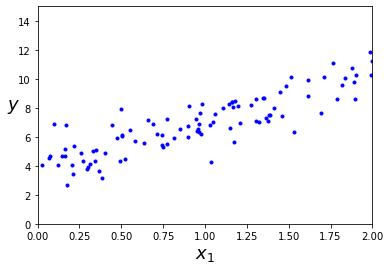

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Zad 
Wyznacz parametry prostej regresji (najmniejszych kwadratów) ze wzoru:

$$
\theta= (X^TX)^{-1}  X^T  y; 
$$

gdzie 
$$
X = 
\begin{bmatrix}
1, x_1 \\
1, x_2 \\
\vdots, \vdots \\
1, x_n \\
\end{bmatrix}
$$

Zwizualizuj wynik.

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.88823272],
       [3.15546496]])

In [4]:
f = lambda x: theta_best[0][0] * x + theta_best[1][0]

X_new = np.linspace(0, 2, 100)
y_predict = f(X_new)

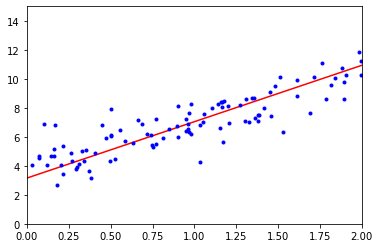

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Prównaj z wynikiem funkcji:
```python
LinearRegression()
```

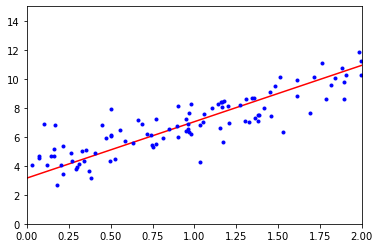

In [6]:
from sklearn.linear_model import LinearRegression

log_reg = LinearRegression()
log_reg.fit(X, y)

f2 = lambda x: log_reg.intercept_[0] * x + log_reg.coef_[0]

X_new = np.linspace(0, 2, 100)
y_predict = f2(X_new)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Wykonaj algorytm minimalizacji gradientowej (w prostej petli).
Wykorzystaj pochodną.

Funkcja kosztu regresji:
$$
MSE(X;\theta) = \frac{1}{m} \sum ( \theta^T x_i - y_i  )^2.
$$

Pochodna funkcja kosztu regresji:

$$
\frac{\partial}{\partial \theta_j}MSE(X;\theta) = \frac{2}{m} \sum ( \theta^T x_i - y_i  )^2 x_i^{j}.
$$

Czyli gradient wynosi:

$$
\nabla_{\theta}MSE(X;\theta) = 
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE\\
    \frac{\partial}{\partial \theta_1}MSE\\
    \vdots \\
    \frac{\partial}{\partial \theta_d}MSE
\end{bmatrix}
=
\frac{2}{m} X^T(\theta^TX - Y  ).
$$

Metoda gradientowa

$$
\theta^{\small \mbox{Nex step}} = \theta - \eta \nabla_{\theta} MSE
$$

### Zapisz wszystkie $\theta$ w liście 

In [7]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta_path_bgd = []

theta_0 = np.random.randn(2,1)  # random initialization

theta = theta_0


def MSE(theta):
    return X_b.T.dot((X_b).dot(theta) - y) * (2 / m)

In [8]:
def step_gradient_2d(theta, eta):
    gradient = MSE(theta)

    # new_x = x_current - x_gradient*eta
    # new_y = y_current - y_gradient*eta
    theta_path_bgd.append(theta)
    new_theta = theta - gradient * eta
    return new_theta


for i in range(n_iterations):
    theta = step_gradient_2d(theta, eta)

print(theta)
print(theta_path_bgd)

[[3.88823272]
 [3.15546496]]
[array([[-1.72503746],
       [ 0.66473987]]), array([[-0.13369475],
       [ 2.31407752]]), array([[0.82901763],
       [3.27124145]]), array([[1.41907457],
       [3.81933729]]), array([[1.78798296],
       [4.12589249]]), array([[2.02542409],
       [4.29003477]]), array([[2.18448974],
       [4.37041286]]), array([[2.29661723],
       [4.40172011]]), array([[2.38042803],
       [4.40447333]]), array([[2.44695858],
       [4.3908    ]]), array([[2.50275599],
       [4.36786315]]), array([[2.55171002],
       [4.33988821]]), array([[2.59613739],
       [4.30936255]]), array([[2.63742341],
       [4.27774532]]), array([[2.67640175],
       [4.24588755]]), array([[2.71357921],
       [4.21428077]]), array([[2.74926875],
       [4.18320408]]), array([[2.78366818],
       [4.15281127]]), array([[2.81690686],
       [4.12318224]]), array([[2.8490732 ],
       [4.09435356]]), array([[2.88023107],
       [4.06633645]]), array([[2.91042944],
       [4.03912742]])

# Zad
Zaimplemrntu Stochastic Gradient Descent.

### Zapisz wszystkie $\theta$ w liście 

In [9]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = theta_0


In [11]:
# linear regression using "mini-batch" gradient descent
# function to compute hypothesis / predictions
def hypothesis(X, theta):
    return np.dot(X, theta)


# function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad


# function to compute the error for current values of theta
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]


# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0

    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches


# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate=0.001, batch_size=32):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 3
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))

    return theta, theta_path_bgd

# Zad
Zaimplemrntu Mini-batch gradient descent

### Zapisz wszystkie $\theta$ w liście 

In [12]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = theta_0

In [13]:
a, b = gradientDescent(X, y, batch_size=minibatch_size)
print(b)
theta_path_mgd = b

print(theta)

[array([[-1.72503746],
       [ 0.66473987]]), array([[-0.13369475],
       [ 2.31407752]]), array([[0.82901763],
       [3.27124145]]), array([[1.41907457],
       [3.81933729]]), array([[1.78798296],
       [4.12589249]]), array([[2.02542409],
       [4.29003477]]), array([[2.18448974],
       [4.37041286]]), array([[2.29661723],
       [4.40172011]]), array([[2.38042803],
       [4.40447333]]), array([[2.44695858],
       [4.3908    ]]), array([[2.50275599],
       [4.36786315]]), array([[2.55171002],
       [4.33988821]]), array([[2.59613739],
       [4.30936255]]), array([[2.63742341],
       [4.27774532]]), array([[2.67640175],
       [4.24588755]]), array([[2.71357921],
       [4.21428077]]), array([[2.74926875],
       [4.18320408]]), array([[2.78366818],
       [4.15281127]]), array([[2.81690686],
       [4.12318224]]), array([[2.8490732 ],
       [4.09435356]]), array([[2.88023107],
       [4.06633645]]), array([[2.91042944],
       [4.03912742]]), array([[2.93970816],
      

# Zad
Narysuj jak zmieniały parametr w różnych metodach.

In [14]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [15]:
print(theta_path_bgd)
print(theta_path_sgd)
print(theta_path_mgd)
theta_path_mgd

[[[-1.72503746]
  [ 0.66473987]]

 [[-0.13369475]
  [ 2.31407752]]

 [[ 0.82901763]
  [ 3.27124145]]

 ...

 [[ 3.88823272]
  [ 3.15546496]]

 [[ 3.88823272]
  [ 3.15546496]]

 [[ 3.88823272]
  [ 3.15546496]]]
[]
[[[-1.72503746]
  [ 0.66473987]]

 [[-0.13369475]
  [ 2.31407752]]

 [[ 0.82901763]
  [ 3.27124145]]

 ...

 [[ 3.88823272]
  [ 3.15546496]]

 [[ 3.88823272]
  [ 3.15546496]]

 [[ 3.88823272]
  [ 3.15546496]]]


array([[[-1.72503746],
        [ 0.66473987]],

       [[-0.13369475],
        [ 2.31407752]],

       [[ 0.82901763],
        [ 3.27124145]],

       ...,

       [[ 3.88823272],
        [ 3.15546496]],

       [[ 3.88823272],
        [ 3.15546496]],

       [[ 3.88823272],
        [ 3.15546496]]])